# Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from tqdm import tqdm
from IPython.display import display

# Data

In [2]:
data_am = pd.read_csv("df_VEH0124_AM.csv")
data_nz = pd.read_csv("df_VEH0124_NZ.csv")
data = pd.concat([data_am, data_nz], axis=0)

In [3]:
data

,BodyType,Make,GenModel,Model,YearFirstUsed,YearManufacture,LicenceStatus,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014
0,Cars,ABARTH,ABARTH 124,124 GT MULTIAIR,2019,2019,Licensed,5,5,5,6,6,[z],[z],[z],[z],[z]
1,Cars,ABARTH,ABARTH 124,124 GT MULTIAIR,2019,2019,SORN,3,3,3,2,2,[z],[z],[z],[z],[z]
2,Cars,ABARTH,ABARTH 124,124 GT MULTIAIR,2018,2018,Licensed,11,12,11,12,12,12,[z],[z],[z],[z]
3,Cars,ABARTH,ABARTH 124,124 GT MULTIAIR,2018,2018,SORN,1,0,0,0,0,0,[z],[z],[z],[z]
4,Cars,ABARTH,ABARTH 124,124 GT MULTIAIR AUTO,2019,2019,Licensed,12,12,12,13,11,[z],[z],[z],[z],[z]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376373,Motorcycles,ZONTES,ZONTES ZT,ZT 350 GK,2022,2022,SORN,1,0,[z],[z],[z],[z],[z],[z],[z],[z]
376374,Motorcycles,ZONTES,ZONTES ZT,ZT 350-T,2023,2023,Licensed,31,[z],[z],[z],[z],[z],[z],[z],[z],[z]
376375,Motorcycles,ZONTES,ZONTES ZT,ZT 350-T,2023,2023,SORN,1,[z],[z],[z],[z],[z],[z],[z],[z],[z]
376376,Motorcycles,ZONTES,ZONTES ZT,ZT 350-T,2022,2022,Licensed,12,14,[z],[z],[z],[z],[z],[z],[z],[z]


## Explore

In [4]:
data.describe(include='all')

,BodyType,Make,GenModel,Model,YearFirstUsed,YearManufacture,LicenceStatus,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014
count,901195,901195,901194,901195,901195,901195,901195,901195.000000,901195,901195,901195,901195,901195,901195,901195,901195,901195
unique,6,877,7424,71274,125,125,2,NaN,4289,4266,4297,4313,4353,4390,4418,4358,4331
top,Cars,FORD,BMW 3 SERIES,MISSING,[x],[x],Licensed,NaN,1,1,1,1,1,1,1,1,[z]
freq,519400,57331,13302,137570,237527,43351,511193,NaN,231617,226643,221884,217129,211927,207157,200451,194542,189010
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.787685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,354.166064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.BodyType.unique()

array(['Cars', 'Heavy goods vehicles', 'Light goods vehicles',
       'Other vehicles', 'Motorcycles', 'Buses and coaches'], dtype=object)

In [6]:
years = ['2023','2022','2021','2020','2019','2018','2017','2016','2015','2014']
print(f"[z]s in years: {sum(len(data[data[year] == '[z]']) for year in years):,} (out of {len(data):,})")

[z]s in years: 853,954 (out of 901,195)


## Clean

In [7]:
data.loc[:,'YearFirstUsed'] = data['YearFirstUsed'].replace('[x]',0)
data['YearFirstUsed'] = data['YearFirstUsed'].astype(int)
data.loc[:,'YearManufacture'] = data['YearManufacture'].replace('[x]',0)
data['YearManufacture'] = data['YearManufacture'].astype(int)
data[years] = data[years].replace('[z]',0).astype(int)

## Transform

In [8]:
data_melt = data.melt(
    id_vars=['BodyType','Make','GenModel','Model','YearFirstUsed','YearManufacture','LicenceStatus'],
    var_name='Year',
    value_name='Count'
)
data_melt['Year'] = data_melt['Year'].astype(int)
data_melt

,BodyType,Make,GenModel,Model,YearFirstUsed,YearManufacture,LicenceStatus,Year,Count
0,Cars,ABARTH,ABARTH 124,124 GT MULTIAIR,2019,2019,Licensed,2023,5
1,Cars,ABARTH,ABARTH 124,124 GT MULTIAIR,2019,2019,SORN,2023,3
2,Cars,ABARTH,ABARTH 124,124 GT MULTIAIR,2018,2018,Licensed,2023,11
3,Cars,ABARTH,ABARTH 124,124 GT MULTIAIR,2018,2018,SORN,2023,1
4,Cars,ABARTH,ABARTH 124,124 GT MULTIAIR AUTO,2019,2019,Licensed,2023,12
...,...,...,...,...,...,...,...,...,...
9011945,Motorcycles,ZONTES,ZONTES ZT,ZT 350 GK,2022,2022,SORN,2014,0
9011946,Motorcycles,ZONTES,ZONTES ZT,ZT 350-T,2023,2023,Licensed,2014,0
9011947,Motorcycles,ZONTES,ZONTES ZT,ZT 350-T,2023,2023,SORN,2014,0
9011948,Motorcycles,ZONTES,ZONTES ZT,ZT 350-T,2022,2022,Licensed,2014,0


In [9]:
data_pivot = data_melt.pivot_table(
    index=['BodyType','Make','GenModel','Model','YearFirstUsed','YearManufacture','Year'],
    columns='LicenceStatus',
    values='Count',
    aggfunc='sum'
).reset_index()
data_pivot['Licensed'] = data_pivot['Licensed'].fillna(0)
data_pivot['SORN'] = data_pivot['SORN'].fillna(0)

In [10]:
data_pivot["LS_Ratio"] = data_pivot["Licensed"] / data_pivot["SORN"]
data_pivot["LS_Ratio"] = data_pivot["LS_Ratio"].replace([np.inf, -np.inf], np.nan)
# data_pivot["LS_Ratio"] = data_pivot["LS_Ratio"].fillna(0)

In [11]:
data_pivot_grouped = data_pivot.groupby(['Make','GenModel','Model','YearManufacture'])

for n in [1,2,3,4]:
    data_pivot[f'LS_Ratio_-{n}'] = data_pivot_grouped['LS_Ratio'].shift(n)
    data_pivot[f'LS_Ratio_-{n}'] = data_pivot[f'LS_Ratio_-{n}'].fillna(0)

data_pivot['LS_Ratio_Mean_5yr'] = data_pivot[['LS_Ratio', 'LS_Ratio_-1', 'LS_Ratio_-2', 'LS_Ratio_-3', 'LS_Ratio_-4']].mean(axis=1)
data_pivot['LS_Ratio_Mean_3yr'] = data_pivot[['LS_Ratio', 'LS_Ratio_-1', 'LS_Ratio_-2']].mean(axis=1)

In [12]:
data_pivot

LicenceStatus,BodyType,Make,GenModel,Model,YearFirstUsed,YearManufacture,Year,Licensed,SORN,LS_Ratio,LS_Ratio_-1,LS_Ratio_-2,LS_Ratio_-3,LS_Ratio_-4,LS_Ratio_Mean_5yr,LS_Ratio_Mean_3yr
0,Buses and coaches,AIXAM,AIXAM MODEL MISSING,MISSING,2007,2007,2014,6.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.000000
1,Buses and coaches,AIXAM,AIXAM MODEL MISSING,MISSING,2007,2007,2015,6.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.000000
2,Buses and coaches,AIXAM,AIXAM MODEL MISSING,MISSING,2007,2007,2016,5.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.000000
3,Buses and coaches,AIXAM,AIXAM MODEL MISSING,MISSING,2007,2007,2017,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.2,0.333333
4,Buses and coaches,AIXAM,AIXAM MODEL MISSING,MISSING,2007,2007,2018,2.0,1.0,2.0,1.0,0.0,0.0,0.0,0.6,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5442275,Other vehicles,ZONGSHEN,ZONGSHEN MODEL MISSING,MISSING,2018,2018,2019,1.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.000000
5442276,Other vehicles,ZONGSHEN,ZONGSHEN MODEL MISSING,MISSING,2018,2018,2020,1.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.000000
5442277,Other vehicles,ZONGSHEN,ZONGSHEN MODEL MISSING,MISSING,2018,2018,2021,1.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.000000
5442278,Other vehicles,ZONGSHEN,ZONGSHEN MODEL MISSING,MISSING,2018,2018,2022,1.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.000000


# Initial stats

In [13]:
cols = ['BodyType', 'Make', 'GenModel', 'Model', 'YearFirstUsed', 'YearManufacture', 'Year', 'Licensed', 'SORN', 'LS_Ratio', 'LS_Ratio_Mean_5yr']

In [15]:
data_pivot[cols].sort_values('Licensed', ascending=False).head()

LicenceStatus,BodyType,Make,GenModel,Model,YearFirstUsed,YearManufacture,Year,Licensed,SORN,LS_Ratio,LS_Ratio_Mean_5yr
903070,Cars,FORD,FORD FIESTA,FIESTA ZETEC,2014,2014,2014,62883.0,131.0,480.022901,174.762913
903071,Cars,FORD,FORD FIESTA,FIESTA ZETEC,2014,2014,2015,62048.0,87.0,713.195402,292.035327
903074,Cars,FORD,FORD FIESTA,FIESTA ZETEC,2014,2014,2018,61815.0,200.0,309.075000,447.578298
903073,Cars,FORD,FORD FIESTA,FIESTA ZETEC,2014,2014,2017,61643.0,186.0,331.413978,394.938298
903075,Cars,FORD,FORD FIESTA,FIESTA ZETEC,2014,2014,2019,61479.0,248.0,247.899194,401.153557


In [16]:
data_pivot[data_pivot['Year'] == 2023][cols].sort_values('Licensed', ascending=False).head()

LicenceStatus,BodyType,Make,GenModel,Model,YearFirstUsed,YearManufacture,Year,Licensed,SORN,LS_Ratio,LS_Ratio_Mean_5yr
903079,Cars,FORD,FORD FIESTA,FIESTA ZETEC,2014,2014,2023,59497.0,466.0,127.675966,181.586768
903059,Cars,FORD,FORD FIESTA,FIESTA ZETEC,2013,2013,2023,57043.0,661.0,86.298033,147.299685
5313379,Other vehicles,OTHER BRITISH,OTHER BRITISH MODEL MISSING,MISSING,0,0,2023,53291.0,3687.0,14.453756,15.771869
903099,Cars,FORD,FORD FIESTA,FIESTA ZETEC,2015,2015,2023,44551.0,358.0,124.444134,194.471242
903039,Cars,FORD,FORD FIESTA,FIESTA ZETEC,2012,2012,2023,41358.0,631.0,65.543582,97.118805


In [17]:
# data_pivot[cols].sort_values('SORN', ascending=False).head()
data_pivot[data_pivot['Model'] != 'MISSING'][cols].sort_values('SORN', ascending=False).head()

LicenceStatus,BodyType,Make,GenModel,Model,YearFirstUsed,YearManufacture,Year,Licensed,SORN,LS_Ratio,LS_Ratio_Mean_5yr
3649379,Light goods vehicles,FORD,FORD TRANSIT,TRANSIT 350 LWB,2005,2005,2023,3595.0,3490.0,1.030086,1.770879
3649378,Light goods vehicles,FORD,FORD TRANSIT,TRANSIT 350 LWB,2005,2005,2022,4540.0,3314.0,1.369946,2.294359
927256,Cars,FORD,FORD FOCUS,FOCUS ZETEC,2001,2001,2020,5041.0,3268.0,1.542534,3.806116
1322399,Cars,LAND ROVER,LAND ROVER DISCOVERY,DISCOVERY TDI,1995,1995,2023,450.0,3240.0,0.138889,0.214124
1322398,Cars,LAND ROVER,LAND ROVER DISCOVERY,DISCOVERY TDI,1995,1995,2022,537.0,3227.0,0.166408,0.264618


In [18]:
# data_pivot[data_pivot['Year'] == 2023][cols].sort_values('SORN', ascending=False).head()
data_pivot[(data_pivot['Year'] == 2023) & (data_pivot['Model'] != 'MISSING')][cols].sort_values('SORN', ascending=False).head()

LicenceStatus,BodyType,Make,GenModel,Model,YearFirstUsed,YearManufacture,Year,Licensed,SORN,LS_Ratio,LS_Ratio_Mean_5yr
3649379,Light goods vehicles,FORD,FORD TRANSIT,TRANSIT 350 LWB,2005,2005,2023,3595.0,3490.0,1.030086,1.770879
1322399,Cars,LAND ROVER,LAND ROVER DISCOVERY,DISCOVERY TDI,1995,1995,2023,450.0,3240.0,0.138889,0.214124
927259,Cars,FORD,FORD FOCUS,FOCUS ZETEC,2001,2001,2023,1944.0,3122.0,0.622678,1.269642
2946899,Cars,VOLKSWAGEN,VOLKSWAGEN GOLF,GOLF GT TDI,2002,2002,2023,3802.0,3118.0,1.219371,2.103164
3650259,Light goods vehicles,FORD,FORD TRANSIT,TRANSIT 350 LWB TD,2003,2003,2023,2439.0,3044.0,0.801248,1.306807


In [19]:
data_pivot[(data_pivot['SORN'] > 1000) & (data_pivot['Model'] != 'MISSING')][cols].sort_values('LS_Ratio', ascending=False).head()

LicenceStatus,BodyType,Make,GenModel,Model,YearFirstUsed,YearManufacture,Year,Licensed,SORN,LS_Ratio,LS_Ratio_Mean_5yr
904255,Cars,FORD,FORD FIESTA,FIESTA ZETEC CLIMATE,2007,2007,2019,25694.0,1031.0,24.921435,51.591100
927250,Cars,FORD,FORD FOCUS,FOCUS ZETEC,2001,2001,2014,35653.0,1624.0,21.953818,4.712318
2793270,Cars,VAUXHALL,VAUXHALL CORSA,CORSA SXI 16V,2003,2003,2014,22007.0,1180.0,18.650000,3.970476
927281,Cars,FORD,FORD FOCUS,FOCUS ZETEC,2002,2002,2015,27948.0,1506.0,18.557769,10.969193
904256,Cars,FORD,FORD FIESTA,FIESTA ZETEC CLIMATE,2007,2007,2020,23902.0,1354.0,17.652880,35.028479


In [14]:
data_pivot[data_pivot['Model'] == 'MISSING'][cols].sort_values('Licensed', ascending=False).head()

LicenceStatus,BodyType,Make,GenModel,Model,YearFirstUsed,YearManufacture,Year,Licensed,SORN,LS_Ratio,LS_Ratio_Mean_5yr
5313378,Other vehicles,OTHER BRITISH,OTHER BRITISH MODEL MISSING,MISSING,0,0,2022,53515.0,3540.0,15.117232,16.599769
5313379,Other vehicles,OTHER BRITISH,OTHER BRITISH MODEL MISSING,MISSING,0,0,2023,53291.0,3687.0,14.453756,15.771869
5313377,Other vehicles,OTHER BRITISH,OTHER BRITISH MODEL MISSING,MISSING,0,0,2021,52836.0,3395.0,15.562887,17.413692
5313376,Other vehicles,OTHER BRITISH,OTHER BRITISH MODEL MISSING,MISSING,0,0,2020,52518.0,3242.0,16.199260,18.378758
5313375,Other vehicles,OTHER BRITISH,OTHER BRITISH MODEL MISSING,MISSING,0,0,2019,52491.0,2995.0,17.526210,19.735102


# Plotting

In [21]:
def plots(df):
    car_data_grouped_by_year = df[['Year', 'Licensed', 'SORN']]
    car_data_grouped_by_year = car_data_grouped_by_year.groupby('Year').sum()

    fig, ax1 = plt.subplots(figsize=(10,6))
    ax2 = ax1.twinx()
    plt.title("Count of licensed and SORN vehicles, and ratio, per year")

    sns.lineplot(data=car_data_grouped_by_year, x="Year", y="Licensed", ax=ax1, label="Licensed", color="b", errorbar=None, estimator=None)
    sns.lineplot(data=car_data_grouped_by_year, x="Year", y="SORN", ax=ax1, label="SORN", color="g", errorbar=None, estimator=None)
    ax1.set_ylabel("Licensed & SORN", color="black")
    ax1.set_xlabel("Year")

    car_data_grouped_by_year['LS_Ratio_Group'] = car_data_grouped_by_year['Licensed'] / car_data_grouped_by_year['SORN']
    
    sns.lineplot(data=car_data_grouped_by_year, x="Year", y="LS_Ratio_Group", ax=ax2, label="Ratio", color="r", errorbar=None)
    ax2.axhline(1, color='black', linewidth=0.8, linestyle='--')
    ax2.set_ylabel("Licensed to SORN Ratio", color="red")

    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    lines = lines1 + lines2
    labels = labels1 + labels2
    plt.legend(lines, labels, loc='best')

    plt.show()

    display(car_data_grouped_by_year)

    car_data_grouped_by_manu_year = df[df['Year'] == 2023][['YearManufacture','Licensed']].groupby('YearManufacture').sum()

    plt.figure(figsize=(11,6))
    plt.title("Count of licensed cars in 2023 per year of manufacture")
    sns.barplot(car_data_grouped_by_manu_year, x=car_data_grouped_by_manu_year.index, y='Licensed')
    plt.xlabel("Year of Manufacture")
    plt.xticks(rotation=45)
    plt.show()
    
    display(car_data_grouped_by_manu_year)

# Search

In [22]:
search_col = 'Model'
search_phrase = r'FIESTA ST'

model_search_data = data[data[search_col].str.contains(search_phrase, case=False, na=False)]
results = model_search_data[search_col].unique()

print(model_search_data[search_col].nunique())
for i, c in enumerate(results):
    print(f"{i}: {c}")

58
0: FIESTA ST
1: FIESTA ST 500
2: FIESTA ST EDITION TURBO
3: FIESTA ST PERFORMANCE ED TURBO
4: FIESTA ST TURBO
5: FIESTA ST-1 TURBO
6: FIESTA ST-2 TURBO
7: FIESTA ST-3 TURBO
8: FIESTA ST-LINE
9: FIESTA ST-LINE BLACK EDITION
10: FIESTA ST-LINE ED TRBO MHEV A
11: FIESTA ST-LINE EDITION T MHEV
12: FIESTA ST-LINE EDITION TDCI
13: FIESTA ST-LINE EDITION TURBO
14: FIESTA ST-LINE EDITION TURBO A
15: FIESTA ST-LINE RED EDITION
16: FIESTA ST-LINE TDCI
17: FIESTA ST-LINE TURBO
18: FIESTA ST-LINE TURBO AUTO
19: FIESTA ST-LINE TURBO MHEV
20: FIESTA ST-LINE TURBO MHEV AUTO
21: FIESTA ST-LINE VIGNALE T MHEV
22: FIESTA ST-LINE VIGNALE TURBO
23: FIESTA ST-LINE X ED T MHEV A
24: FIESTA ST-LINE X ED TURBO AUTO
25: FIESTA ST-LINE X EDITION TDCI
26: FIESTA ST-LINE X EDITION TURBO
27: FIESTA ST-LINE X TDCI
28: FIESTA ST-LINE X TURBO
29: FIESTA ST-LINE X TURBO AUTO
30: FIESTA ST-LINE X TURBO MHEV A
31: FIESTA ST-LNE VIGNALE T MHEV A
32: FIESTA ST200
33: FIESTA STLINE X EDITION T MHEV
34: FIESTA STUDIO
35:

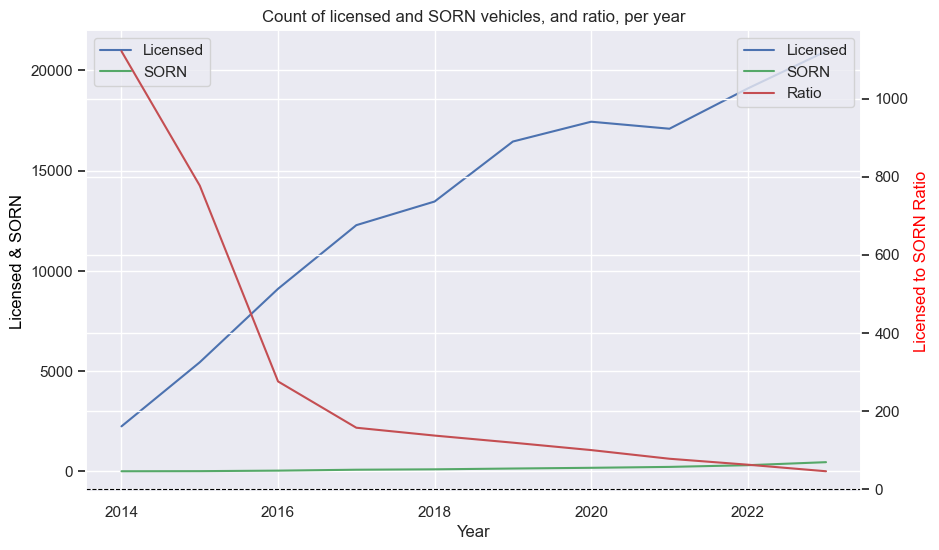

LicenceStatus,Licensed,SORN,LS_Ratio_Group
Year,,,
2014,2242.0,2.0,1121.000000
2015,5440.0,7.0,777.142857
2016,9106.0,33.0,275.939394
2017,12281.0,78.0,157.448718
2018,13461.0,98.0,137.357143
2019,16454.0,138.0,119.231884
2020,17443.0,174.0,100.247126
2021,17093.0,219.0,78.050228
2022,19102.0,304.0,62.835526


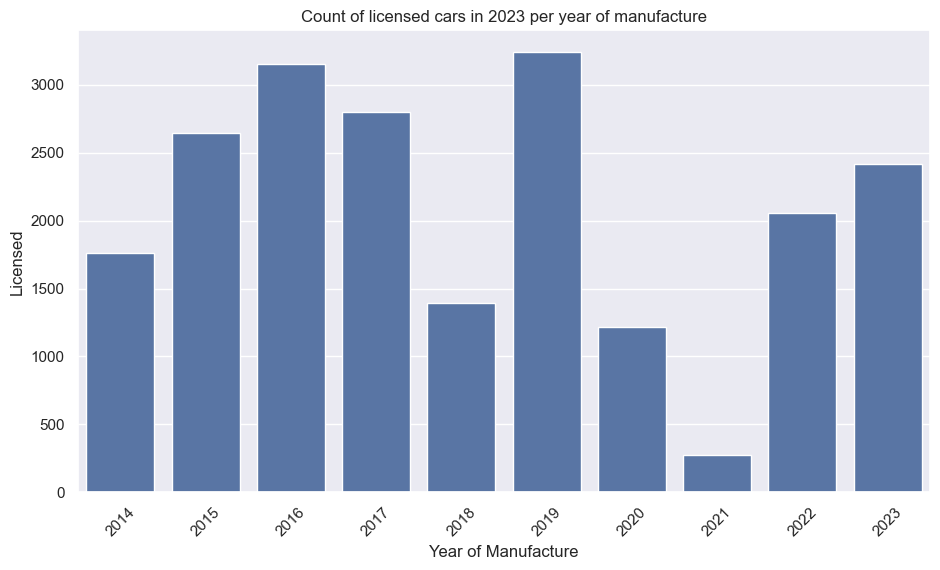

LicenceStatus,Licensed
YearManufacture,
2014,1759.0
2015,2647.0
2016,3154.0
2017,2803.0
2018,1392.0
2019,3239.0
2020,1215.0
2021,276.0
2022,2055.0


In [23]:
choice = 7
model_data = data[data[search_col] == results[choice]]
model_data_pivot = data_pivot[data_pivot[search_col] == results[choice]]
model_data_pivot.head()
plots(model_data_pivot)

# Stats

In [24]:
display(
    data_pivot[(data_pivot['BodyType'] == 'Cars') & (data_pivot['YearManufacture'] < 2000) & (data_pivot['Model'] != 'MISSING') & (data_pivot['Licensed'] > 100) & (data_pivot['Year'] == 2023)]
    .drop(['BodyType','Year','LS_Ratio_-1','LS_Ratio_-2','LS_Ratio_-3','LS_Ratio_-4'], axis=1)
    .sort_values('LS_Ratio_Mean_5yr', ascending=False)
    .head(5)
)

display(
    data_pivot[(data_pivot['BodyType'] == 'Cars') & (data_pivot['YearManufacture'] < 2000) & (data_pivot['Model'] != 'MISSING') & (data_pivot['Licensed'] > 100) & (data_pivot['Year'] == 2023)]
    .drop(['BodyType','GenModel','YearFirstUsed','YearManufacture','Year','LS_Ratio_-1','LS_Ratio_-2','LS_Ratio_-3','LS_Ratio_-4'], axis=1)
    .groupby('Model', as_index=False)
    .agg({'Make':'first', 'Licensed':'sum', 'SORN':'sum', 'LS_Ratio':'mean', 'LS_Ratio_Mean_5yr':'mean', 'LS_Ratio_Mean_3yr':'mean'})
    .sort_values('LS_Ratio_Mean_5yr', ascending=False)
    .head(5)
)

display(
    data_pivot[(data_pivot['BodyType'] == 'Cars') & (data_pivot['YearManufacture'] < 2000) & (data_pivot['Model'] != 'MISSING') & (data_pivot['Licensed'] > 100) & (data_pivot['Year'] == 2023)]
    .drop(['Model','YearFirstUsed','YearManufacture','Year','LS_Ratio_-1','LS_Ratio_-2','LS_Ratio_-3','LS_Ratio_-4'], axis=1)
    .groupby('GenModel', as_index=False)
    .agg({'Make':'first', 'Licensed':'sum', 'SORN':'sum', 'LS_Ratio_Mean_5yr':'mean', 'LS_Ratio_Mean_3yr':'mean'})
    .sort_values('LS_Ratio_Mean_5yr', ascending=False)
    .head(5)
)

LicenceStatus,Make,GenModel,Model,YearFirstUsed,YearManufacture,Licensed,SORN,LS_Ratio,LS_Ratio_Mean_5yr,LS_Ratio_Mean_3yr
1723709,MG,MG MGB,B,1981,1980,159.0,5.0,31.800000,48.960000,80.600000
1725259,MG,MG MGB,B GT,1981,1980,164.0,5.0,32.800000,33.526667,55.544444
1723289,MG,MG MGB,B,1974,1973,101.0,8.0,12.625000,15.925000,15.652778
1722969,MG,MG MGB,B,1966,1966,113.0,13.0,8.692308,9.127772,9.193473
1722029,MG,MG MGA,A,1959,0,171.0,22.0,7.772727,8.135448,7.689065


LicenceStatus,Model,Make,Licensed,SORN,LS_Ratio,LS_Ratio_Mean_5yr,LS_Ratio_Mean_3yr
192,MINI MINOR,MORRIS,108.0,15.0,7.200000,6.695833,6.986111
259,TR2,TRIUMPH,136.0,22.0,6.181818,6.093074,6.139971
50,A,MG,1042.0,192.0,5.757499,5.948549,5.850808
205,MUSTANG GT,FORD,210.0,35.0,6.238095,5.926916,6.240947
63,B,MG,12297.0,4302.0,4.823928,5.338588,6.451258


LicenceStatus,GenModel,Make,Licensed,SORN,LS_Ratio_Mean_5yr,LS_Ratio_Mean_3yr
108,TRIUMPH TR2,TRIUMPH,136.0,22.0,6.093074,6.139971
67,MG MGA,MG,1042.0,192.0,5.948549,5.850808
30,FORD MUSTANG,FORD,325.0,64.0,5.644761,5.678685
111,TRIUMPH TR5,TRIUMPH,298.0,55.0,5.267664,5.602357
109,TRIUMPH TR3,TRIUMPH,122.0,28.0,5.016905,4.644841


# Phoenix 🐦‍🔥

In [25]:
phoenix_data = data_pivot[(data_pivot['YearManufacture'] < 2000) & (data_pivot['Model'] != 'MISSING')].sort_values('Make', ascending=True)

In [26]:
switch = 1  # set to 1 to enable, set to 0 to disable
min_licensed_lt = 50  # set very high to "deactivate"
now_licensed_gt = 100  # set to 0 to "deactivate"
now_licensed_lt = 999999  # set very high to "deactivate"
ls_ratio_multiplier = 1.5  # set to 0 to "deactivate"
ls_ratio_lt = 99999  # set very high to "deactivate"
ls_ratio_gt = 0  # set to 0 to "deactivate"
ls_ratio_2023_gt = 0  # set to 0 to "deactivate"

phoenixes = []

for (make, genmodel, model, yearmanufacture), model_data in phoenix_data[['Make','GenModel','Model','YearManufacture','Year','Licensed','SORN']].groupby(['Make','GenModel','Model','YearManufacture']):
    model_data_grouped = model_data.groupby(['Make','GenModel','Model','YearManufacture','Year'], as_index=False).sum()
    model_data_grouped["LS_Ratio_Group"] = model_data_grouped["Licensed"] / model_data_grouped["SORN"]
    model_data_grouped["LS_Ratio_Group"] = model_data_grouped["LS_Ratio_Group"].replace([np.inf, -np.inf], np.nan)
    model_data_grouped['Switch'] = (model_data_grouped['LS_Ratio_Group'].transform(lambda x: (x > 1) & (x.shift(1) < 1)))
    if ((model_data_grouped['Switch'].sum() >= switch) 
        & (model_data_grouped['Licensed'] <= min_licensed_lt).any() 
        & (model_data_grouped[model_data_grouped['Year']==2023]['Licensed'] >= now_licensed_gt).any() 
        & (model_data_grouped[model_data_grouped['Year']==2023]['Licensed'] <= now_licensed_lt).any() 
        & (model_data_grouped['LS_Ratio_Group'][9] > (ls_ratio_multiplier * model_data_grouped['LS_Ratio_Group'].mean()))
        & (model_data_grouped['LS_Ratio_Group'] <= ls_ratio_lt).any()
        & (model_data_grouped['LS_Ratio_Group'] >= ls_ratio_gt).any()
        & (model_data_grouped['LS_Ratio_Group'][9] >= ls_ratio_2023_gt).any()
        ):
            print(f"🐦‍🔥? {make} / {genmodel} / {model} / {yearmanufacture}")
            phoenixes.append({f"{make} / {genmodel} / {model} / {yearmanufacture}" : model_data_grouped})
            # display(model_data_grouped)

🐦‍🔥? CHEVROLET GMC / CHEVROLET GMC CORVETTE / CORVETTE / 1978
🐦‍🔥? FORD / FORD ESCORT / ESCORT 1600 SPORT / 1979
🐦‍🔥? FORD / FORD ESCORT / ESCORT GHIA / 1980
🐦‍🔥? FORD / FORD ESCORT / ESCORT MEXICO / 1978
🐦‍🔥? FORD / FORD ESCORT / ESCORT RS / 1978
🐦‍🔥? FORD / FORD ESCORT / ESCORT RS / 1979
🐦‍🔥? MERCEDES / MERCEDES 300 / 350 SL AUTO / 1979
🐦‍🔥? PORSCHE / PORSCHE 911 / 911 / 1976
🐦‍🔥? TRIUMPH / TRIUMPH STAG / STAG AUTO / 1978
🐦‍🔥? YAMAHA / YAMAHA RD / RD 250 / 1981


LicenceStatus,Make,GenModel,Model,YearManufacture,Year,Licensed,SORN,LS_Ratio_Group,Switch
0,PORSCHE,PORSCHE 911,911,1976,2014,39.0,76.0,0.513158,False
1,PORSCHE,PORSCHE 911,911,1976,2015,46.0,71.0,0.647887,False
2,PORSCHE,PORSCHE 911,911,1976,2016,42.0,77.0,0.545455,False
3,PORSCHE,PORSCHE 911,911,1976,2017,64.0,68.0,0.941176,False
4,PORSCHE,PORSCHE 911,911,1976,2018,77.0,57.0,1.350877,True
5,PORSCHE,PORSCHE 911,911,1976,2019,85.0,54.0,1.574074,False
6,PORSCHE,PORSCHE 911,911,1976,2020,98.0,53.0,1.849057,False
7,PORSCHE,PORSCHE 911,911,1976,2021,98.0,55.0,1.781818,False
8,PORSCHE,PORSCHE 911,911,1976,2022,103.0,51.0,2.019608,False
9,PORSCHE,PORSCHE 911,911,1976,2023,108.0,48.0,2.250000,False


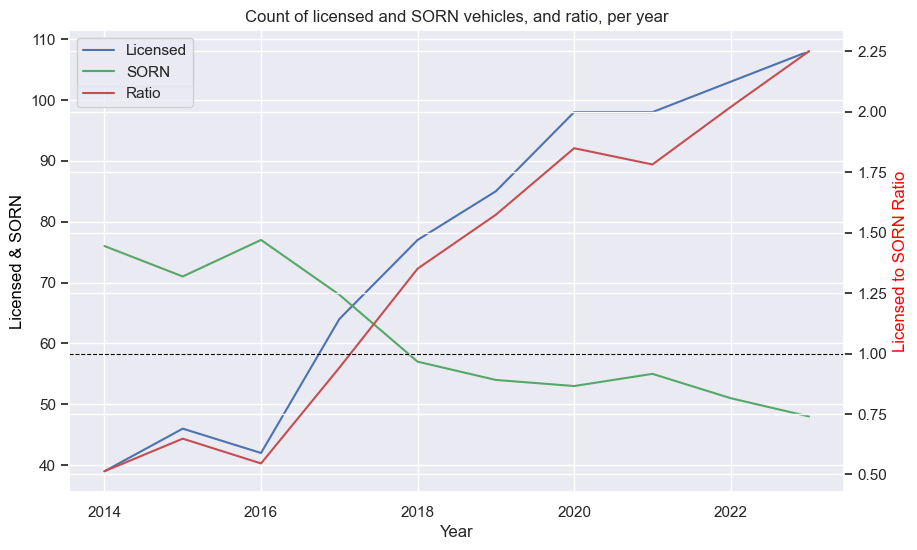

LicenceStatus,Licensed,SORN,LS_Ratio_Group
Year,,,
2014,39.0,76.0,0.513158
2015,46.0,71.0,0.647887
2016,42.0,77.0,0.545455
2017,64.0,68.0,0.941176
2018,77.0,57.0,1.350877
2019,85.0,54.0,1.574074
2020,98.0,53.0,1.849057
2021,98.0,55.0,1.781818
2022,103.0,51.0,2.019608


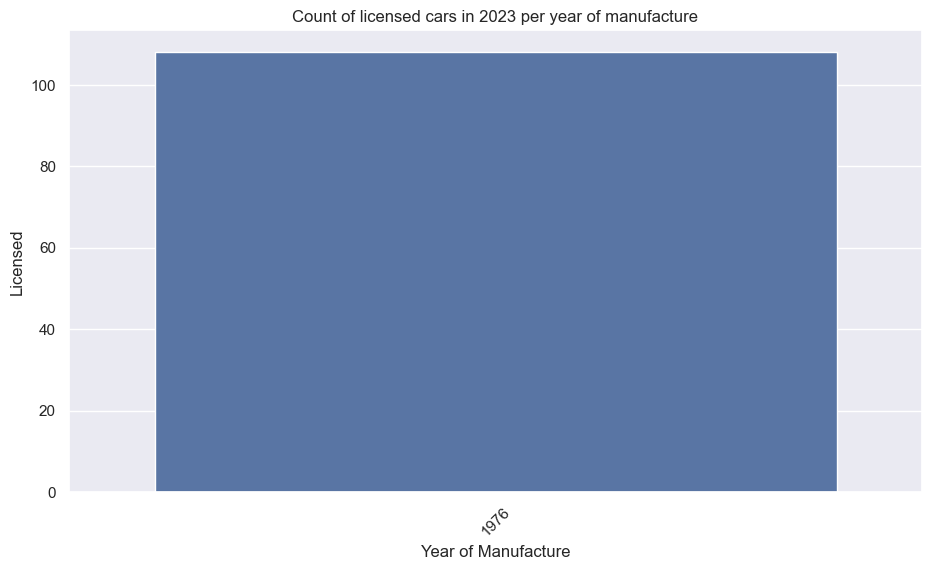

LicenceStatus,Licensed
YearManufacture,
1976,108.0


In [27]:
search_phrase = r'PORSCHE / PORSCHE 911 / 911 / 1976'
phoenix_car = next((item for item in phoenixes if search_phrase in item), None)[search_phrase]
display(phoenix_car)
plots(phoenix_car)

# Chosen cars

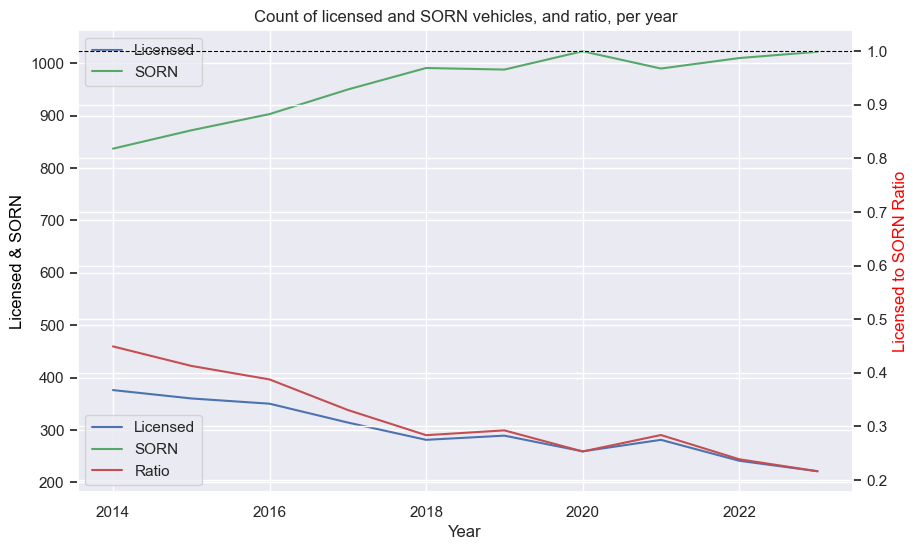

LicenceStatus,Licensed,SORN,LS_Ratio_Group
Year,,,
2014,376.0,837.0,0.449223
2015,360.0,872.0,0.412844
2016,350.0,903.0,0.387597
2017,314.0,950.0,0.330526
2018,281.0,991.0,0.283552
2019,289.0,988.0,0.292510
2020,259.0,1023.0,0.253177
2021,281.0,990.0,0.283838
2022,241.0,1010.0,0.238614


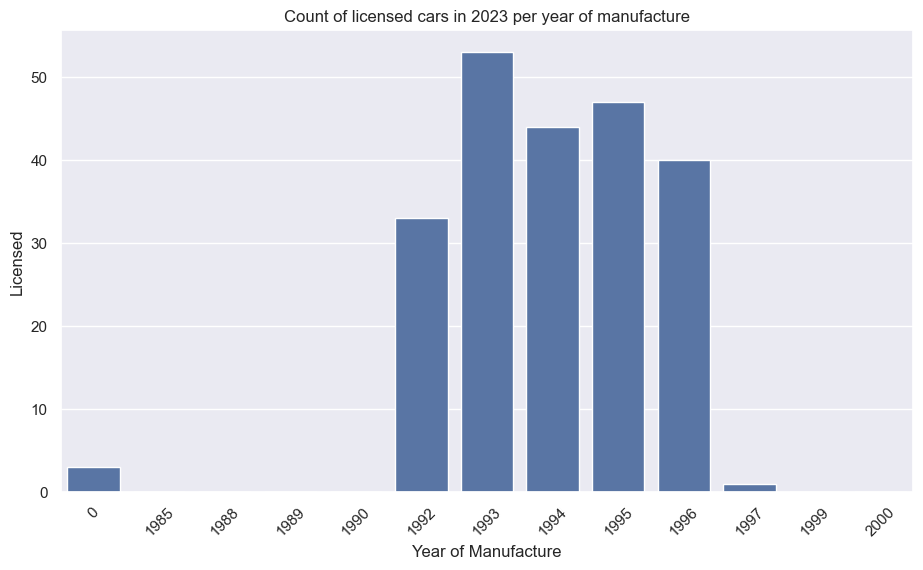

LicenceStatus,Licensed
YearManufacture,
0,3.0
1985,0.0
1988,0.0
1989,0.0
1990,0.0
1992,33.0
1993,53.0
1994,44.0
1995,47.0


In [28]:
rscosworths = data_pivot[(data_pivot.Model == 'ESCORT RS COSWORTH')]
plots(rscosworths)

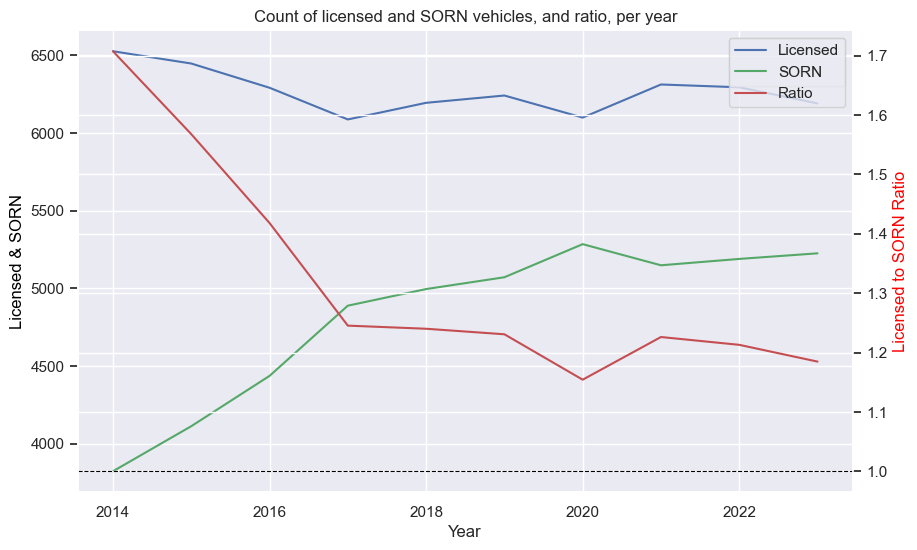

LicenceStatus,Licensed,SORN,LS_Ratio_Group
Year,,,
2014,6526.0,3822.0,1.707483
2015,6447.0,4112.0,1.567850
2016,6291.0,4436.0,1.418170
2017,6087.0,4888.0,1.245295
2018,6194.0,4995.0,1.240040
2019,6241.0,5071.0,1.230724
2020,6099.0,5284.0,1.154239
2021,6312.0,5148.0,1.226107
2022,6294.0,5189.0,1.212950


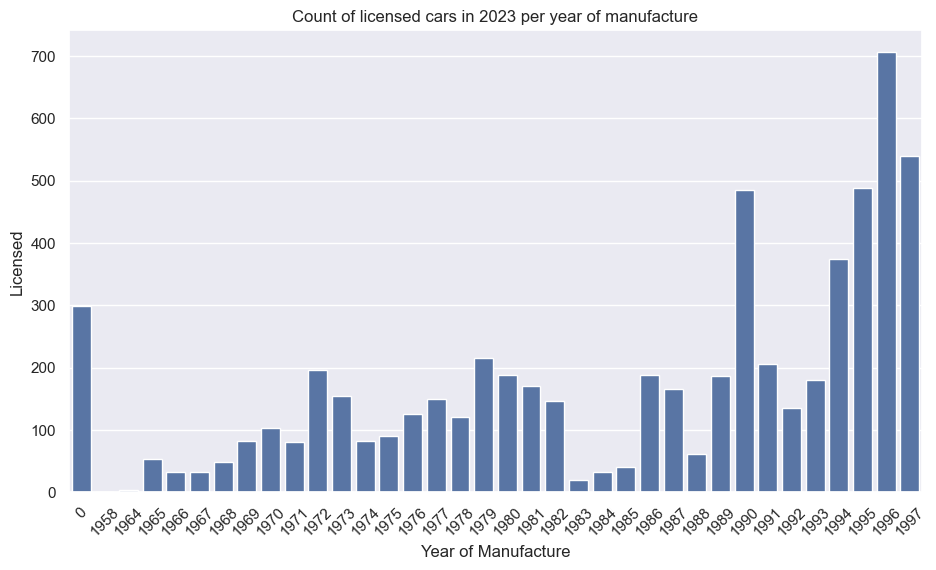

LicenceStatus,Licensed
YearManufacture,
0,299.0
1958,1.0
1964,4.0
1965,53.0
1966,33.0
1967,32.0
1968,49.0
1969,83.0
1970,103.0


In [29]:
p911s = data_pivot[(data_pivot.GenModel == 'PORSCHE 911') & (data_pivot.YearManufacture < 1998)]
plots(p911s)

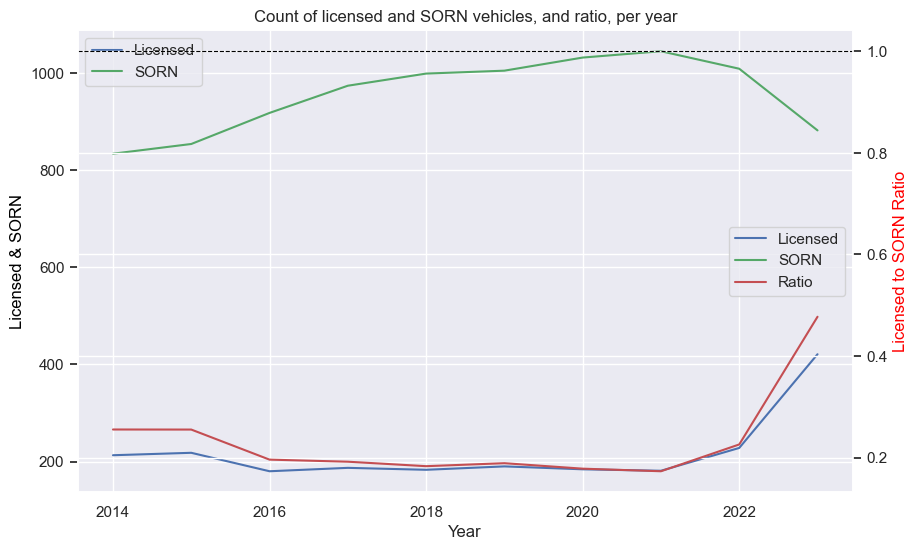

LicenceStatus,Licensed,SORN,LS_Ratio_Group
Year,,,
2014,213.0,834.0,0.255396
2015,218.0,854.0,0.255269
2016,180.0,918.0,0.196078
2017,187.0,974.0,0.191992
2018,183.0,999.0,0.183183
2019,190.0,1005.0,0.189055
2020,184.0,1032.0,0.178295
2021,181.0,1045.0,0.173206
2022,228.0,1009.0,0.225966


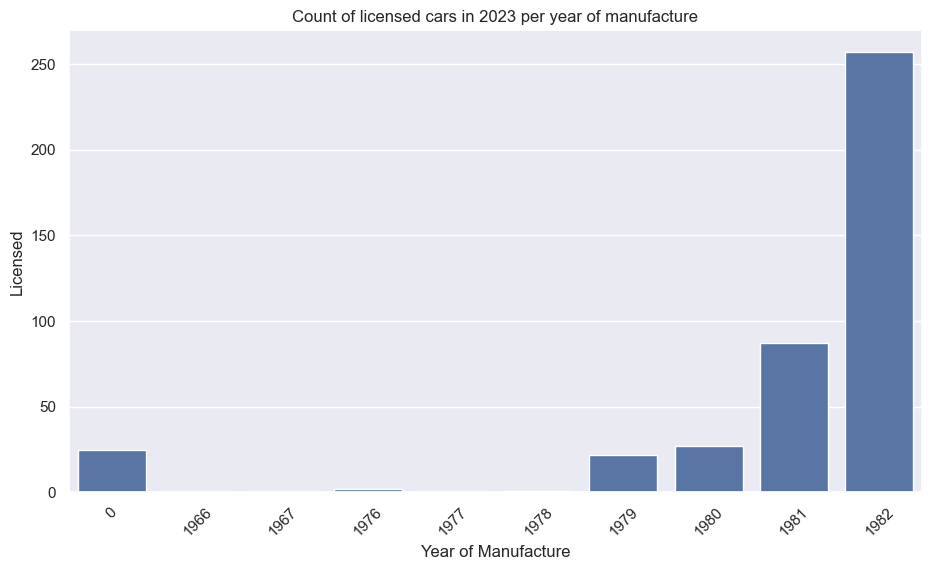

LicenceStatus,Licensed
YearManufacture,
0,25.0
1966,0.0
1967,0.0
1976,2.0
1977,0.0
1978,1.0
1979,22.0
1980,27.0
1981,87.0


In [30]:
golfs = data_pivot[(data_pivot.Model.str.contains('GOLF GTI')) & (data_pivot.YearManufacture < 1983)]
plots(golfs)

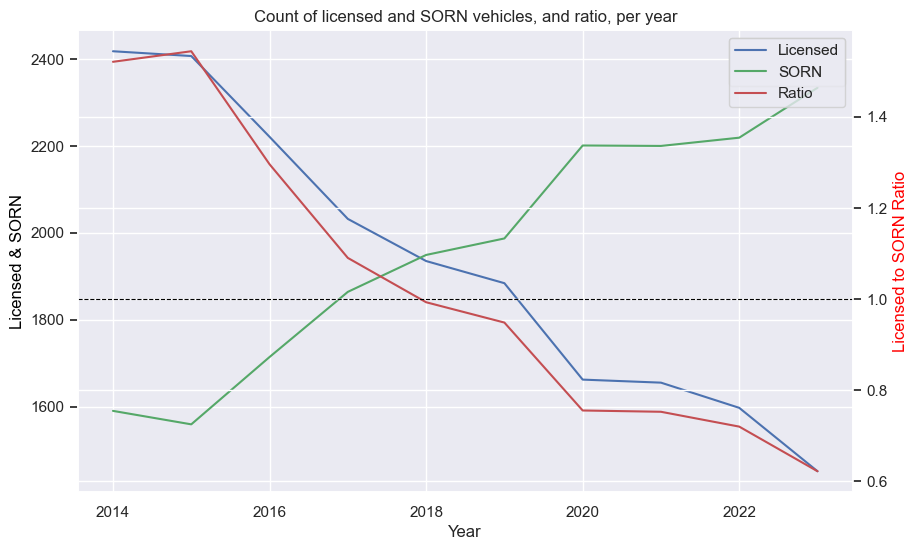

LicenceStatus,Licensed,SORN,LS_Ratio_Group
Year,,,
2014,2418.0,1590.0,1.520755
2015,2407.0,1559.0,1.543938
2016,2221.0,1714.0,1.295799
2017,2032.0,1864.0,1.090129
2018,1935.0,1949.0,0.992817
2019,1884.0,1987.0,0.948163
2020,1662.0,2201.0,0.755111
2021,1655.0,2200.0,0.752273
2022,1597.0,2219.0,0.719694


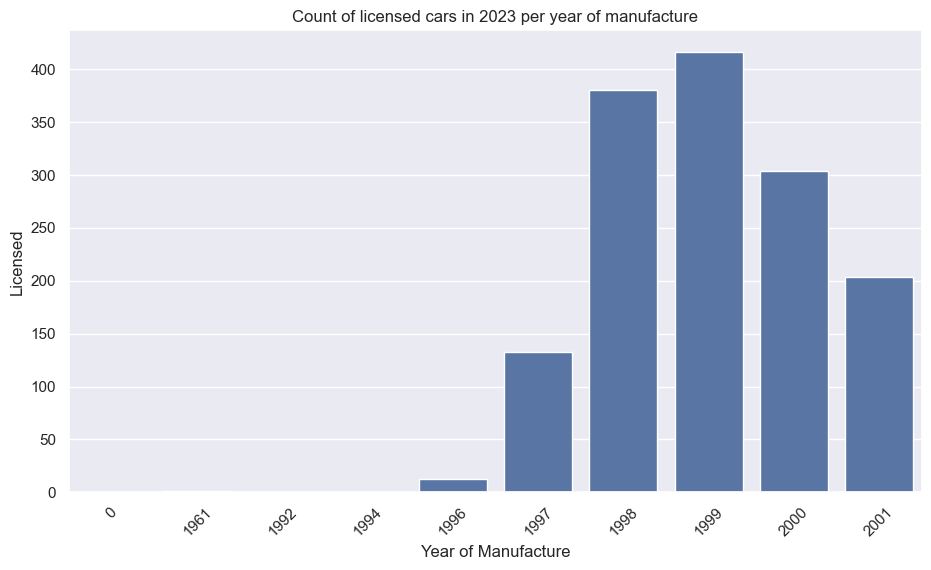

LicenceStatus,Licensed
YearManufacture,
0,0.0
1961,1.0
1992,0.0
1994,0.0
1996,13.0
1997,133.0
1998,380.0
1999,416.0
2000,304.0


In [31]:
elises = data_pivot[(data_pivot.GenModel == 'LOTUS ELISE') & (data_pivot.YearManufacture < 2002)]
plots(elises)

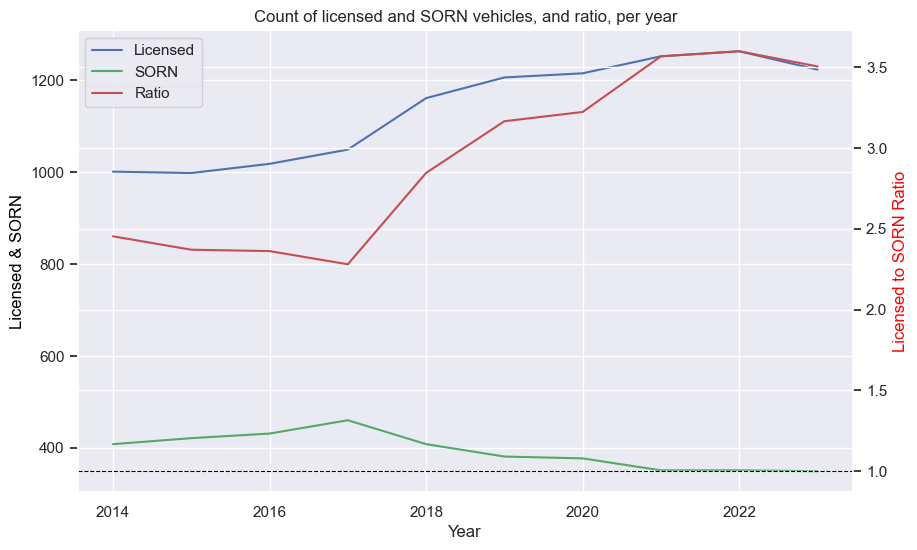

LicenceStatus,Licensed,SORN,LS_Ratio_Group
Year,,,
2014,1001.0,408.0,2.453431
2015,998.0,421.0,2.370546
2016,1018.0,431.0,2.361949
2017,1049.0,460.0,2.280435
2018,1161.0,408.0,2.845588
2019,1206.0,381.0,3.165354
2020,1215.0,377.0,3.222812
2021,1252.0,351.0,3.566952
2022,1263.0,351.0,3.598291


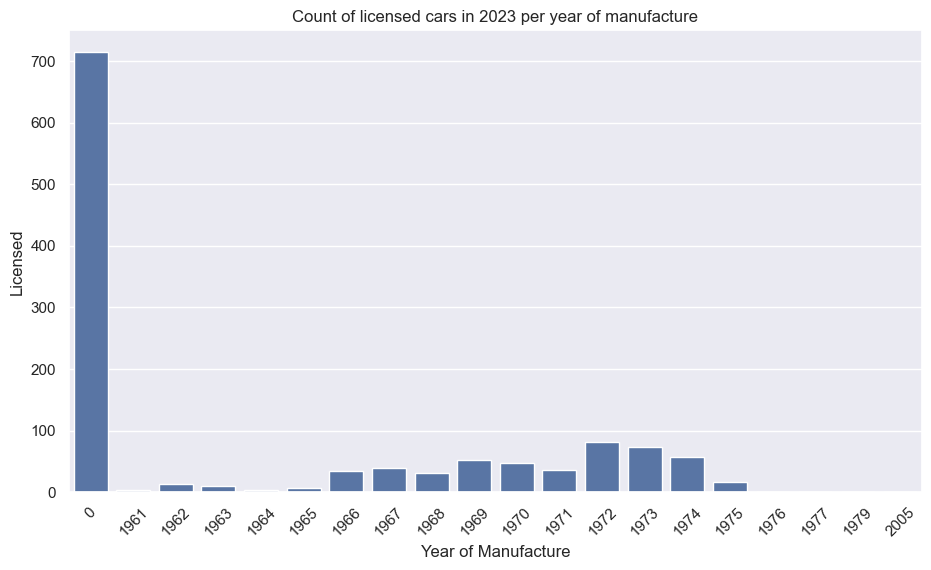

LicenceStatus,Licensed
YearManufacture,
0,714.0
1961,4.0
1962,13.0
1963,10.0
1964,3.0
1965,7.0
1966,35.0
1967,40.0
1968,32.0


In [32]:
etypes = data_pivot[(data_pivot.Make == 'JAGUAR') & ((data_pivot.Model == '2+2 E TYPE') | (data_pivot.Model == 'OPEN E TYPE'))]
plots(etypes)

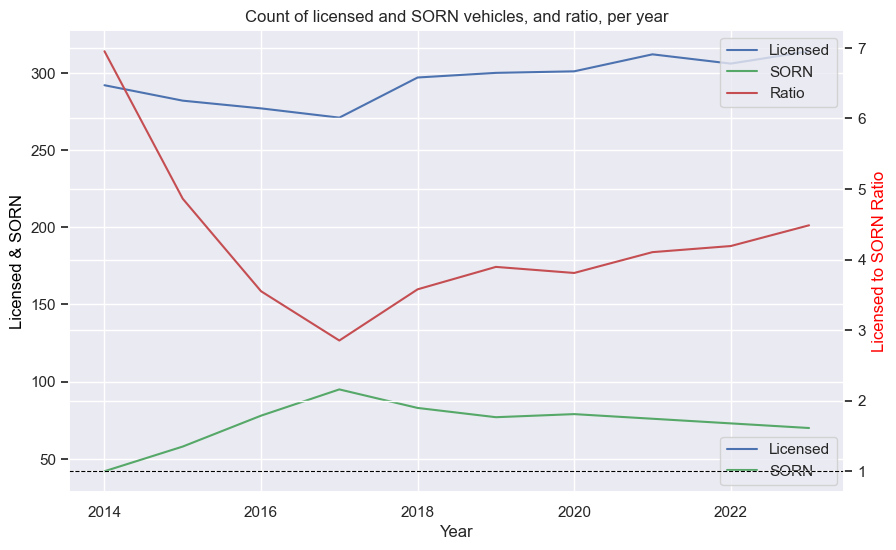

LicenceStatus,Licensed,SORN,LS_Ratio_Group
Year,,,
2014,292.0,42.0,6.952381
2015,282.0,58.0,4.862069
2016,277.0,78.0,3.551282
2017,271.0,95.0,2.852632
2018,297.0,83.0,3.578313
2019,300.0,77.0,3.896104
2020,301.0,79.0,3.810127
2021,312.0,76.0,4.105263
2022,306.0,73.0,4.191781


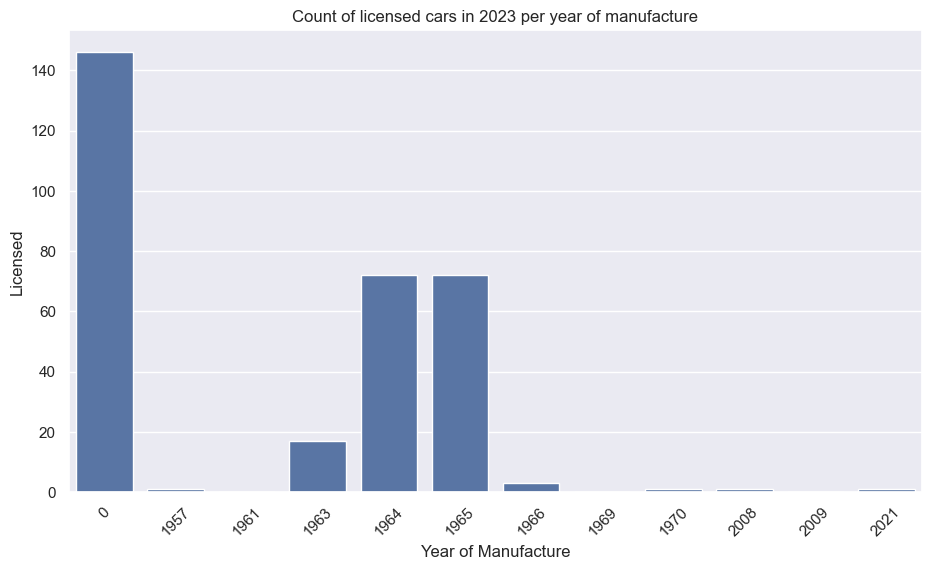

LicenceStatus,Licensed
YearManufacture,
0,146.0
1957,1.0
1961,0.0
1963,17.0
1964,72.0
1965,72.0
1966,3.0
1969,0.0
1970,1.0


In [33]:
db5s = data_pivot[(data_pivot.Make == 'ASTON MARTIN') & (data_pivot.Model == 'DB5')]
plots(db5s)

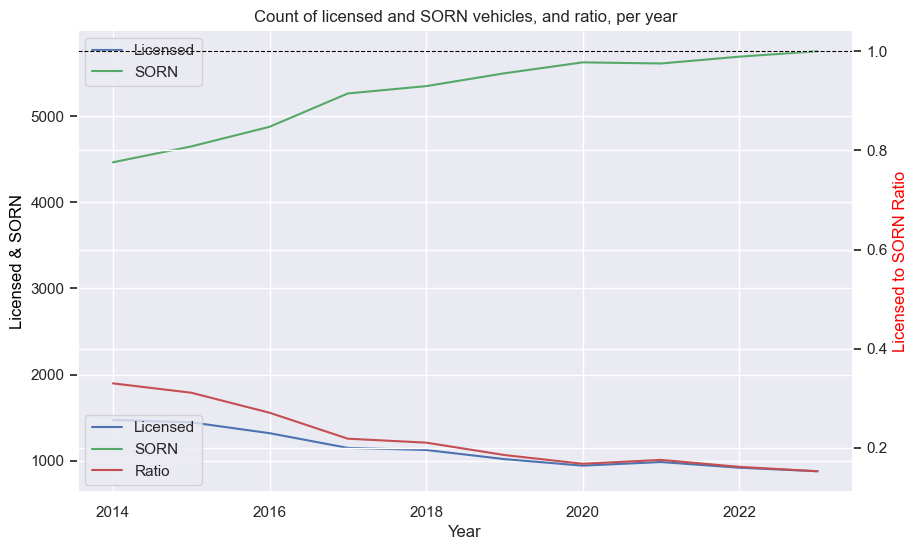

LicenceStatus,Licensed,SORN,LS_Ratio_Group
Year,,,
2014,1473.0,4465.0,0.329899
2015,1446.0,4649.0,0.311035
2016,1320.0,4877.0,0.270658
2017,1149.0,5264.0,0.218275
2018,1125.0,5349.0,0.210320
2019,1019.0,5498.0,0.185340
2020,943.0,5625.0,0.167644
2021,985.0,5612.0,0.175517
2022,919.0,5691.0,0.161483


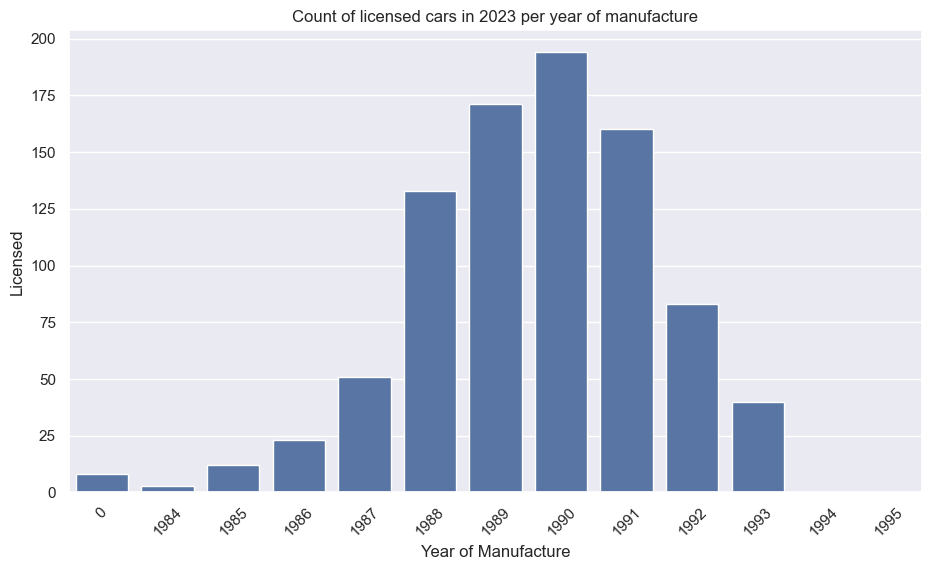

LicenceStatus,Licensed
YearManufacture,
0,8.0
1984,3.0
1985,12.0
1986,23.0
1987,51.0
1988,133.0
1989,171.0
1990,194.0
1991,160.0


In [34]:
pug_205gtis = data_pivot[data_pivot.Model == '205 GTI']
plots(pug_205gtis)

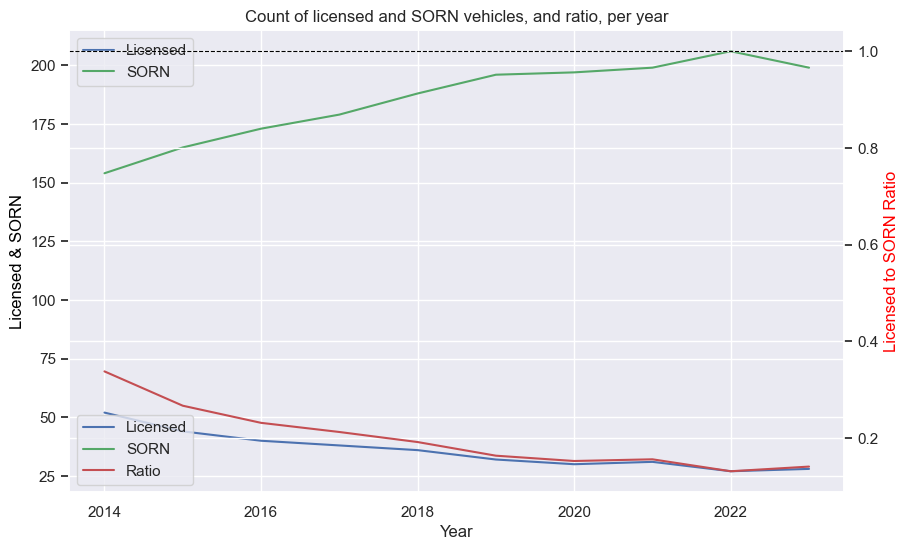

LicenceStatus,Licensed,SORN,LS_Ratio_Group
Year,,,
2014,52.0,154.0,0.337662
2015,44.0,165.0,0.266667
2016,40.0,173.0,0.231214
2017,38.0,179.0,0.212291
2018,36.0,188.0,0.191489
2019,32.0,196.0,0.163265
2020,30.0,197.0,0.152284
2021,31.0,199.0,0.155779
2022,27.0,206.0,0.131068


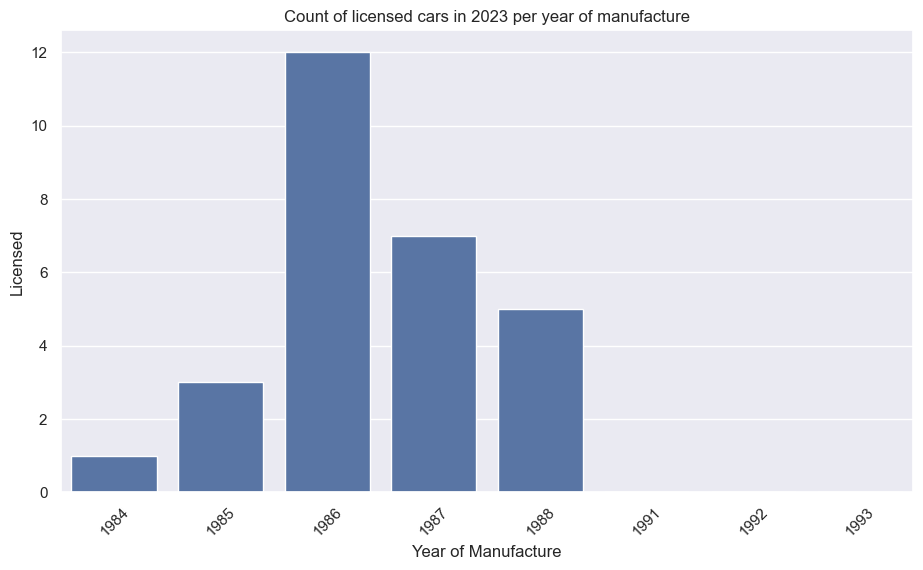

LicenceStatus,Licensed
YearManufacture,
1984,1.0
1985,3.0
1986,12.0
1987,7.0
1988,5.0
1991,0.0
1992,0.0
1993,0.0


In [35]:
mb_190es = data_pivot[(data_pivot.Model == '190E 2.3 16') | (data_pivot.Model == '190E 2.5 16')]
plots(mb_190es)

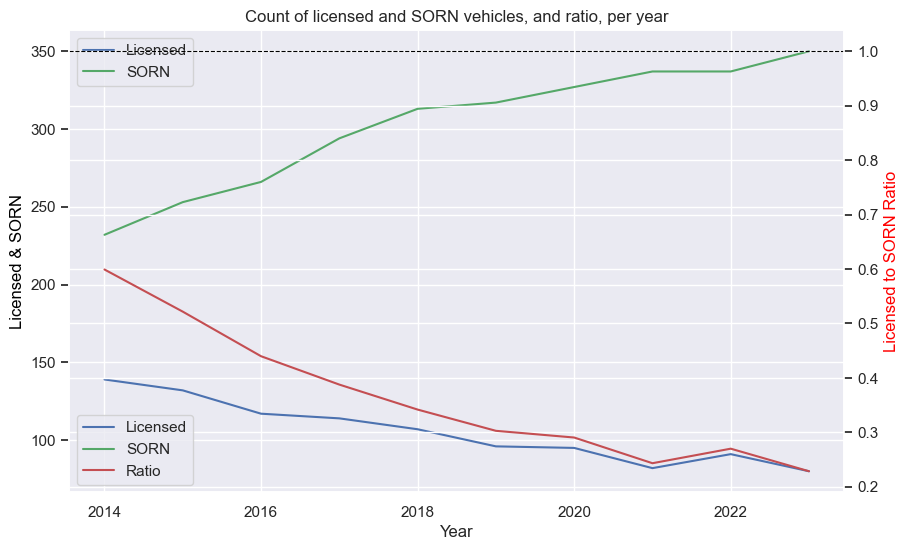

LicenceStatus,Licensed,SORN,LS_Ratio_Group
Year,,,
2014,139.0,232.0,0.599138
2015,132.0,253.0,0.521739
2016,117.0,266.0,0.439850
2017,114.0,294.0,0.387755
2018,107.0,313.0,0.341853
2019,96.0,317.0,0.302839
2020,95.0,327.0,0.290520
2021,82.0,337.0,0.243323
2022,91.0,337.0,0.270030


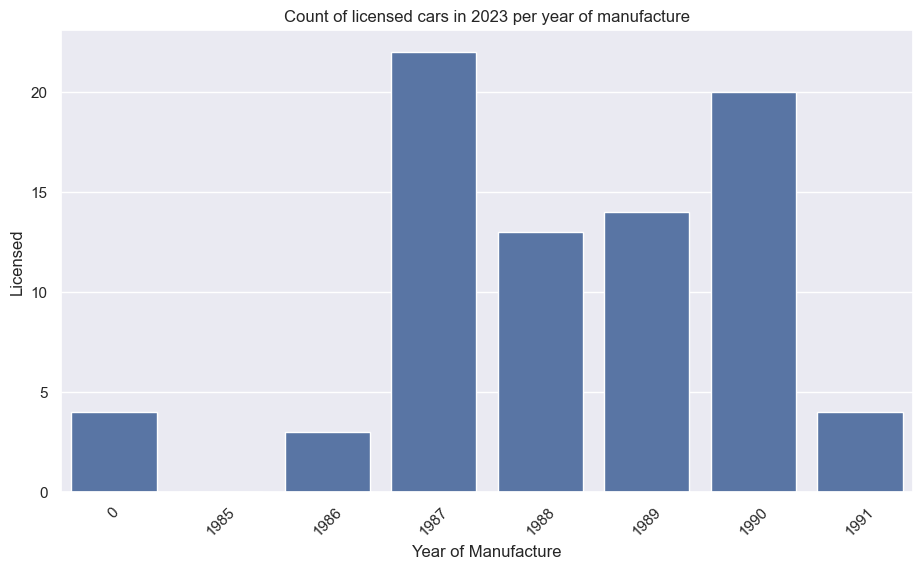

LicenceStatus,Licensed
YearManufacture,
0,4.0
1985,0.0
1986,3.0
1987,22.0
1988,13.0
1989,14.0
1990,20.0
1991,4.0


In [36]:
e30_m3s = data_pivot[(data_pivot.Make == 'BMW') & (data_pivot.Model == 'M3') & (data_pivot.YearManufacture < 1992)]
plots(e30_m3s)

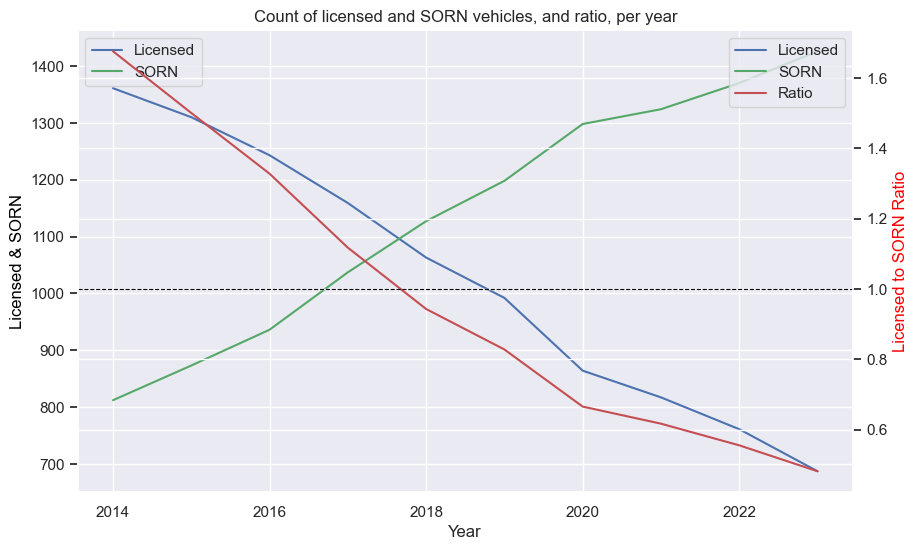

LicenceStatus,Licensed,SORN,LS_Ratio_Group
Year,,,
2014,1361.0,812.0,1.676108
2015,1310.0,873.0,1.500573
2016,1243.0,936.0,1.327991
2017,1159.0,1037.0,1.117647
2018,1063.0,1127.0,0.943212
2019,992.0,1198.0,0.828047
2020,864.0,1298.0,0.665639
2021,817.0,1324.0,0.617069
2022,761.0,1370.0,0.555474


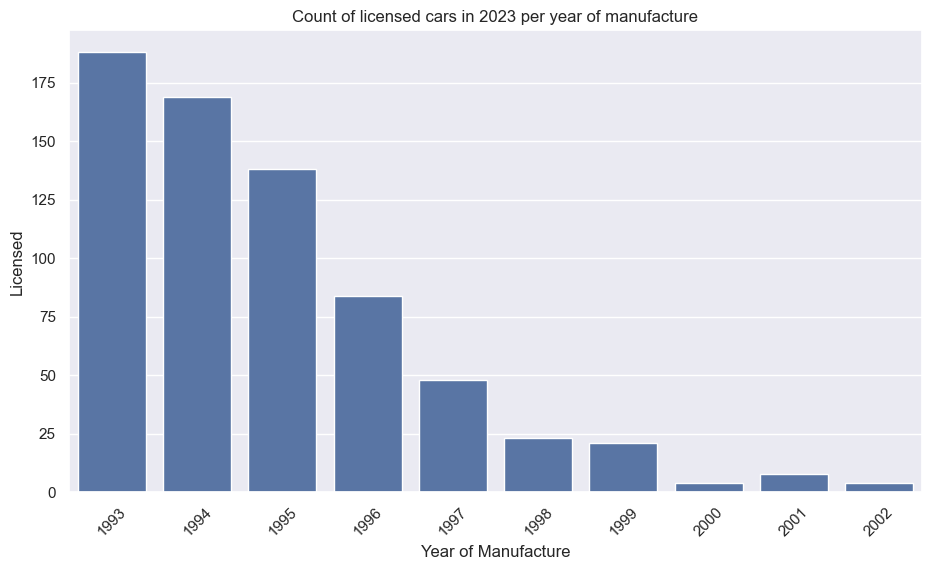

LicenceStatus,Licensed
YearManufacture,
1993,188.0
1994,169.0
1995,138.0
1996,84.0
1997,48.0
1998,23.0
1999,21.0
2000,4.0
2001,8.0


In [37]:
supras = data_pivot[(data_pivot.Make == 'TOYOTA') & (data_pivot.Model == 'SUPRA') & (data_pivot.YearManufacture > 1992) & (data_pivot.YearManufacture < 2003)]
plots(supras)

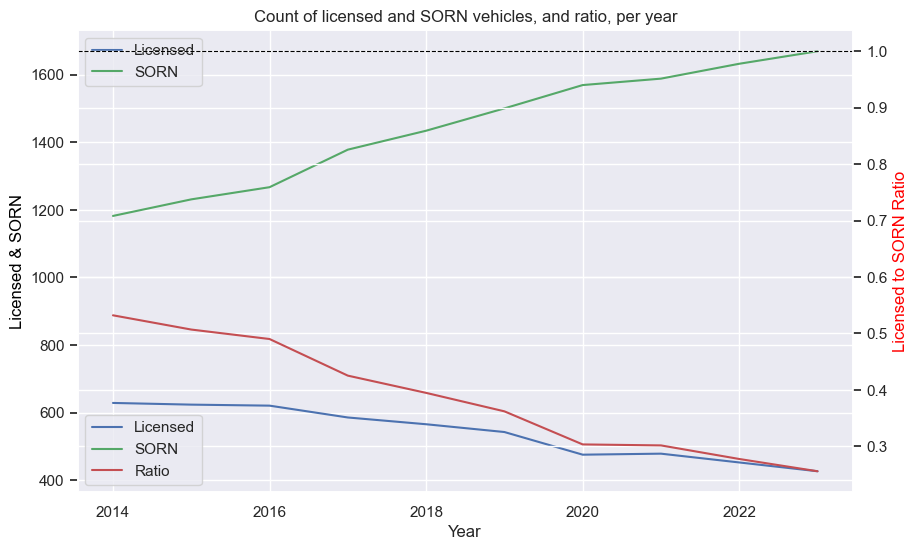

LicenceStatus,Licensed,SORN,LS_Ratio_Group
Year,,,
2014,629.0,1182.0,0.532149
2015,624.0,1231.0,0.506905
2016,621.0,1267.0,0.490134
2017,586.0,1378.0,0.425254
2018,566.0,1434.0,0.394700
2019,543.0,1500.0,0.362000
2020,476.0,1569.0,0.303378
2021,479.0,1588.0,0.301637
2022,453.0,1632.0,0.277574


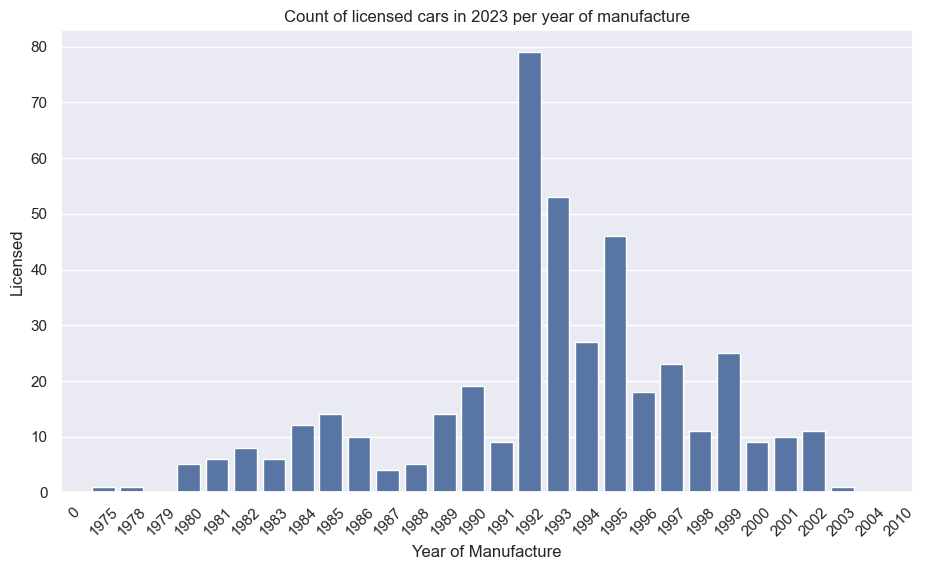

LicenceStatus,Licensed
YearManufacture,
0,0.0
1975,1.0
1978,1.0
1979,0.0
1980,5.0
1981,6.0
1982,8.0
1983,6.0
1984,12.0


In [38]:
rx7s = data_pivot[(data_pivot.Make == 'MAZDA') & (data_pivot.GenModel == 'MAZDA RX-7')]
plots(rx7s)

# Helper

In [39]:
# with pd.option_context('display.max_rows', None):
#     display(car_data)